# Training a vainila neural network

First thing we are going to do is load the packages and import the images. This is not the MNIST dataset. It contains images but are 8x8 pixels.

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

#get the digits dataframe
digits = load_digits()

The digits dataset is not one-hot encoded therefore this has to be processed.

In [2]:
#targets are numbers, we must one-hot encode.
onehot_target = np.zeros((digits.target.shape[0],10)) #10 is number of classes
onehot_target[np.arange(digits.target.shape[0]), digits.target] = 1

Now split the dataset into train and test

In [3]:
#splitting data on training and test
x_train, x_test, y_train, y_test = train_test_split(digits.data/16.0,
                                                        onehot_target,
                                                        test_size=0.20,
                                                        random_state=50)

## Batch gradient descent

In the batch gradient descent we take the full dataset and feed the algorithm with it. Then update the weights.

Advantages:

* Usually fewer computations to reach a local minimum for the cost function
* A more stable error gradient. We are plugging the same data over and over.

Disadvantages:

* We are finding the local minimum closer to the starting point if we use pure gradient descent. This is because we are using the same data all the time (see minibatch later on).
* Lots of memory used. Since we charge all the dataset every time, the matrices are very large and this consumes a lot of memory.
* Model updates may take longer in large datasets.


In [4]:
from neural_network import NeuralNetwork
from neural_network import get_batches #yields the batches when iterating
from neural_network import multiclass_cross_entropy #cross entropy function
import time

In [5]:
learning_rate = 0.05 # rate at which our nn learns (updates weights)
n_neurons = 256 # number of neurons in the two hidden layers
epochs = 150 # passes trhough the full dataset
input_size = 64 #shape input of the images
output_size = 10 # target of the output
batch_size = x_train.shape[0] # we take the full lenght

nn = NeuralNetwork(input_size=input_size, #size of the images 
                   output_size=output_size, #size of the output 10 classes
                   n_neurons=n_neurons) #number of neurons

In [6]:
loss = list()
loss_test = list()
start_time = time.time()
for i in range(epochs):
    data = get_batches(X=x_train,Y=y_train,batch_size=batch_size)
    for x,y in data:
        y = np.array(y)
        nn.TrainStep(x,y,learning_rate=learning_rate)
        loss.append(multiclass_cross_entropy(nn.ForwardPass(x),y))
        loss_test.append(multiclass_cross_entropy(nn.ForwardPass(x_test),y_test))
        
end_time = time.time()

print("Training time: {0:.2f} seconds".format(end_time-start_time))
print("Accuracy on the train: {}".format(nn.Accuracy(x_train,y_train)))
print("Accuracy on the test: {}".format(nn.Accuracy(x_test,y_test)))

Training time: 6.29 seconds
Accuracy on the train: 0.8559498956158664
Accuracy on the test: 0.7888888888888889


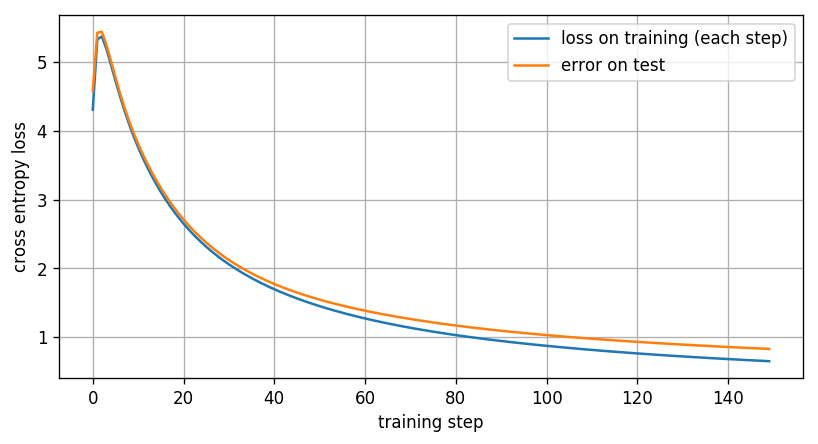

In [7]:
import matplotlib.pyplot as plt

plt.clf()
fig = plt.figure(dpi=120,figsize=(8,4))

plt.plot(loss,label="loss on training (each step)")
plt.plot(loss_test,label="error on test")
plt.grid()
plt.xlabel("training step")
plt.ylabel("cross entropy loss")
plt.legend()
plt.show()

This graph represents the training loss at each step. The batch training provokes that the function is cotinuously decreasing as the data fed to each training step is the same. We are convergin to the nearest local minimum (perhaps it is global).

## Mini-batch gradient descent

In mini batch gradient descent we use a number of samples (not the whole dataset) to update the weights. This has some advantages and disatvantages over the batch gradient descent.

Advantages:

* The model gets updated more often and on different data. By randomizing the batches we can get different local minima when the gradient descent algorithm finishes.
* Compared to the case we update weights on one single example at a time, the weight updates are more efficient. Plus, as we take several examples for each update the effect on a single outlier over the weights decreases.
* It avoids lots of memory consumption, since we do not take the whole dataset every time as in batch gradient descent.

Disadvantages: 

* There's an optimum batch size (hyperparameter) that we could optimize.


In [8]:
batch_size = 64
epochs = 20 # passes trhough the full dataset

nn = NeuralNetwork(input_size=input_size, #size of the images 
                   output_size=output_size, #size of the output 10 classes
                   n_neurons=n_neurons) #number of neurons

In [9]:
loss = list()
loss_test = list()
start_time = time.time()
for i in range(epochs):
    data = get_batches(X=x_train,Y=y_train,batch_size=batch_size)
    for x,y in data:
        y = np.array(y)
        nn.TrainStep(x,y,learning_rate=learning_rate)
        loss.append(multiclass_cross_entropy(nn.ForwardPass(x),y))
        loss_test.append(multiclass_cross_entropy(nn.ForwardPass(x_test),y_test))
        
end_time = time.time()

print("Number of batches per epoch: {}".format(x_train.shape[0]//batch_size))
print("Training time: {0:.2f} seconds".format(end_time-start_time))
print("Accuracy on the train: {}".format(nn.Accuracy(x_train,y_train)))
print("Accuracy on the test: {}".format(nn.Accuracy(x_test,y_test)))

Number of batches per epoch: 22
Training time: 2.28 seconds
Accuracy on the train: 0.9596381350034795
Accuracy on the test: 0.9277777777777778


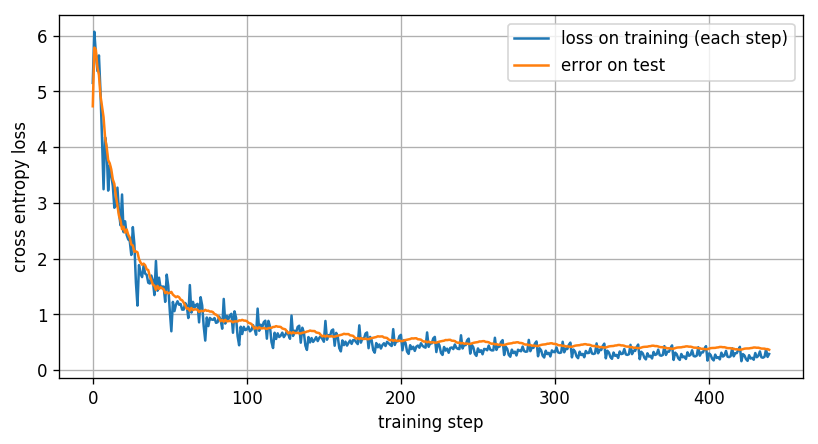

In [10]:
plt.clf()
fig = plt.figure(dpi=120,figsize=(8,4))

plt.plot(loss,label="loss on training (each step)")
plt.plot(loss_test,label="error on test")
plt.grid()
plt.xlabel("training step")
plt.ylabel("cross entropy loss")
plt.legend()
plt.show()

As opposed to the batch gradient descent here we see bumps all the time. This is because the data fed to each trainng step is different every time (it is the same for all epochs though, this is why we see repetitions).

## Stochastic gradient descent

In [15]:
batch_size = 1
epochs = 5 # passes trhough the full dataset

nn = NeuralNetwork(input_size=input_size, #size of the images 
                   output_size=output_size, #size of the output 10 classes
                   n_neurons=n_neurons) #number of neurons

In [16]:
loss = list()
loss_test = list()
start_time = time.time()
for i in range(epochs):
    data = get_batches(X=x_train,Y=y_train,batch_size=batch_size)
    for x,y in data:
        y = np.array(y)
        nn.TrainStep(x,y,learning_rate=learning_rate)
        loss.append(multiclass_cross_entropy(nn.ForwardPass(x),y))
        loss_test.append(multiclass_cross_entropy(nn.ForwardPass(x_test),y_test))
        
end_time = time.time()

print("Number of batches per epoch: {}".format(x_train.shape[0]//batch_size))
print("Training time: {0:.2f} seconds".format(end_time-start_time))
print("Accuracy on the train: {}".format(nn.Accuracy(x_train,y_train)))
print("Accuracy on the test: {}".format(nn.Accuracy(x_test,y_test)))

Number of batches per epoch: 1437
Training time: 27.00 seconds
Accuracy on the train: 0.9944328462073765
Accuracy on the test: 0.9694444444444444


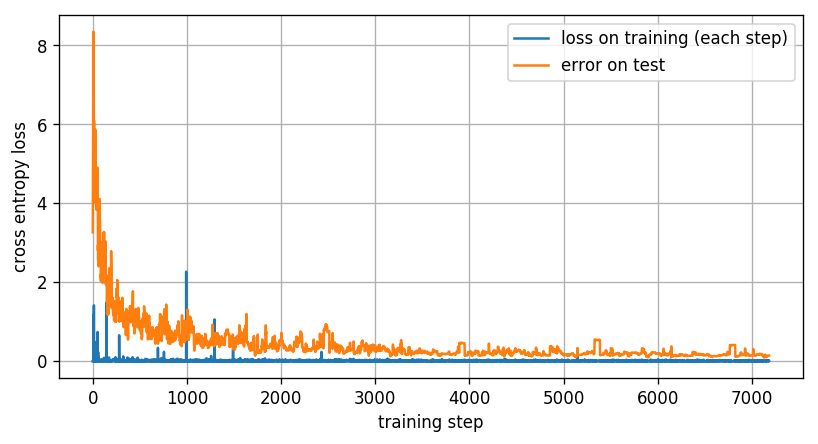

In [17]:
plt.clf()
fig = plt.figure(dpi=120,figsize=(8,4))

plt.plot(loss,label="loss on training (each step)")
plt.plot(loss_test,label="error on test")
plt.grid()
plt.xlabel("training step")
plt.ylabel("cross entropy loss")
plt.legend()
plt.show()

When training over one example at a time we observe more bumps on the training. One single example may cause a lot of error when updating the weights.

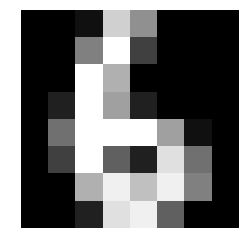

6


In [11]:
rdm_index = np.random.randint(x_test.shape[0])

plt.clf()
plt.imshow(x_test[rdm_index].reshape(8,8),cmap="gray")
plt.axis("off")
plt.show()

print(np.argmax(nn.Predict(x_test[rdm_index])))